Naive Bayes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [5]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
df.columns


Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='str')

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    str    
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    str    
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    str    
 6   hsc_s           215 non-null    str    
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    str    
 9   workex          215 non-null    str    
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    str    
 12  mba_p           215 non-null    float64
 13  status          215 non-null    str    
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), str(8)
memory usage: 25.3 KB


In [8]:
df = df.drop(['salary', 'sl_no', 'gender'], axis=1, errors='ignore')

In [9]:
df.isna().sum()

ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [10]:
placed=df[df.status == "Placed"]
nplaced=df[df.status == "Not Placed"]

In [11]:
print(placed)

     ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t workex  \
0    67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech     No   
1    79.33  Central  78.33   Others   Science     77.48   Sci&Tech    Yes   
2    65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt     No   
4    85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt     No   
7    82.00  Central  64.00  Central   Science     66.00   Sci&Tech    Yes   
..     ...      ...    ...      ...       ...       ...        ...    ...   
209  62.00  Central  72.00  Central  Commerce     65.00  Comm&Mgmt     No   
210  80.60   Others  82.00   Others  Commerce     77.60  Comm&Mgmt     No   
211  58.00   Others  60.00   Others   Science     72.00   Sci&Tech     No   
212  67.00   Others  67.00   Others  Commerce     73.00  Comm&Mgmt    Yes   
213  74.00   Others  66.00   Others  Commerce     58.00  Comm&Mgmt     No   

     etest_p specialisation  mba_p  status  
0       55.0         Mkt&HR  5

In [12]:
print(nplaced)

     ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t workex  \
3     56.0  Central   52.0  Central   Science     52.00   Sci&Tech     No   
5     55.0   Others   49.8   Others   Science     67.25   Sci&Tech    Yes   
6     46.0   Others   49.2   Others  Commerce     79.00  Comm&Mgmt     No   
9     58.0  Central   70.0  Central  Commerce     61.00  Comm&Mgmt     No   
12    47.0  Central   55.0   Others   Science     65.00  Comm&Mgmt     No   
..     ...      ...    ...      ...       ...       ...        ...    ...   
198   67.0  Central   70.0  Central  Commerce     65.00     Others     No   
201   54.2  Central   63.0   Others   Science     58.00  Comm&Mgmt     No   
206   41.0  Central   42.0  Central   Science     60.00  Comm&Mgmt     No   
208   43.0  Central   60.0   Others   Science     65.00  Comm&Mgmt     No   
214   62.0  Central   58.0   Others   Science     53.00  Comm&Mgmt     No   

     etest_p specialisation  mba_p      status  
3      66.00         Mkt&H

In [13]:
x=df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']]
y=df.status.values

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [16]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [17]:
print("Naive Bayes score: ",nb.score(x_test, y_test)*100)

Naive Bayes score:  72.09302325581395


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

predictions = nb.predict(x_test)
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy Score:", accuracy)

precision = precision_score(y_test, predictions)
print("Precision Score:", precision)

recall = recall_score(y_test, predictions)
print("Recall Score:", recall)

f1 = f1_score(y_test, predictions)
print("f1 Score:", f1)

Confusion Matrix:
[[ 5  7]
 [ 5 26]]
Accuracy Score: 0.7209302325581395
Precision Score: 0.7878787878787878
Recall Score: 0.8387096774193549
f1 Score: 0.8125


In [19]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [20]:
print("Naive Bayes score with Multionmial NB classfier: ",clf.score(x_test, y_test)*100)

Naive Bayes score with Multionmial NB classfier:  83.72093023255815


In [28]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(binarize=0.0)
model = mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

TypeError: MultinomialNB.__init__() got an unexpected keyword argument 'binarize'

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.83      0.97      0.90        31

    accuracy                           0.84        43
   macro avg       0.85      0.73      0.76        43
weighted avg       0.84      0.84      0.82        43



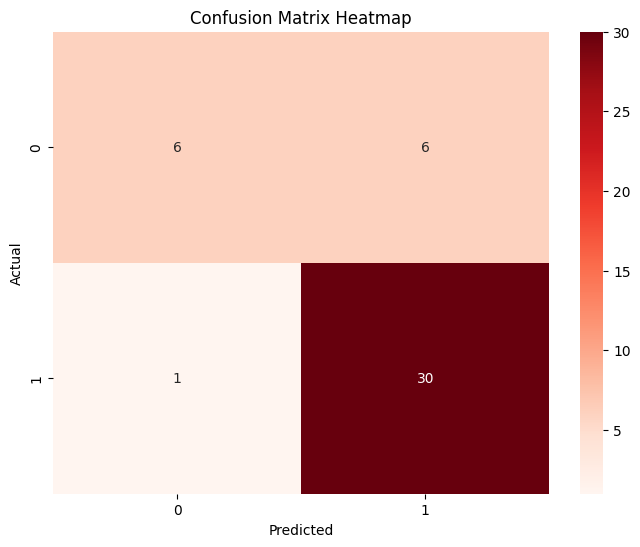

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# 1. Initialize and fit the model (Removed 'binarize' as it's not a valid argument for MultinomialNB)
mnb = MultinomialNB()
model = mnb.fit(x_train, y_train)

# 2. Make predictions
y_pred = mnb.predict(x_test)

# 3. Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 4. Define 'conf_matrix' (This fixes your NameError)
conf_matrix = confusion_matrix(y_test, y_pred)

# 5. Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap="Reds")
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [22]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(x_train, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"binarize binarize: float or None, default=0.0Threshold for binarizing (mapping to booleans) of sample features.If None, input is presumed to already consist of binary vectors.",0.0
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [23]:
print("Naive Bayes score with Multionmial NB classfier: ",clf.score(x_test, y_test)*100)

Naive Bayes score with Multionmial NB classfier:  72.09302325581395


In [24]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(binarize=0.0)
model = bnb.fit(x_train, y_train)
y_pred = bnb.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.72      1.00      0.84        31

    accuracy                           0.72        43
   macro avg       0.36      0.50      0.42        43
weighted avg       0.52      0.72      0.60        43



C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize